# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# nsteps = 0
# while True:
#     nsteps += 1
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
# #     print(actions[0])
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score over {} steps (averaged over agents) this episode: {}'.format(nsteps, np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from ddpg_agent import Agent

agent = Agent(state_size, action_size, 0, num_agents)

using device: cuda:0


In [7]:
import torch
from collections import deque

def train(n_episodes=500, max_t=1000, train=True):
    scores_deque = deque(maxlen=100)
    scores = []
    avg_scores = []
    episode_scores = []
    solved_in = 0
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=train)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        solved_in += 1
        
        for i in range(max_t):
                actions = agent.act(states)                        
                env_info = env.step(actions)[brain_name]           
                next_states = env_info.vector_observations         
                rewards = env_info.rewards                         
                dones = env_info.local_done                        
                agent.step(states, actions, rewards, next_states, dones)
                score += rewards                                   
                states = next_states                               
                if np.any(dones):                                  
                    break 
        episode_score = np.mean(score)
        scores_deque.append(episode_score)
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)
        episode_scores.append(episode_score)
        
        print('\nEpisode {}\tEpisode Score: {:.3f}\tAverage Score: {:.3f}'.format(i_episode, episode_score, avg_score), end="")
        
        if avg_score > 30 and solved_in == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            solved_in = i
    print('\nEnvironment solved in {:d} episodes!'.format(solved_in))
    return avg_scores, episode_scores



In [8]:
avg_scores, episode_scores = train()


Episode 1	Episode Score: 0.547	Average Score: 0.547
Episode 2	Episode Score: 0.411	Average Score: 0.479
Episode 3	Episode Score: 0.520	Average Score: 0.493
Episode 4	Episode Score: 0.746	Average Score: 0.556
Episode 5	Episode Score: 0.496	Average Score: 0.544
Episode 6	Episode Score: 0.629	Average Score: 0.558
Episode 7	Episode Score: 0.490	Average Score: 0.549
Episode 8	Episode Score: 0.812	Average Score: 0.582
Episode 9	Episode Score: 0.991	Average Score: 0.627
Episode 10	Episode Score: 1.082	Average Score: 0.673
Episode 11	Episode Score: 0.831	Average Score: 0.687
Episode 12	Episode Score: 1.119	Average Score: 0.723
Episode 13	Episode Score: 0.888	Average Score: 0.736
Episode 14	Episode Score: 0.816	Average Score: 0.742
Episode 15	Episode Score: 0.982	Average Score: 0.758
Episode 16	Episode Score: 0.644	Average Score: 0.751
Episode 17	Episode Score: 1.072	Average Score: 0.769
Episode 18	Episode Score: 1.234	Average Score: 0.795
Episode 19	Episode Score: 1.218	Average Score: 0.818
E

Episode 152	Episode Score: 35.285	Average Score: 20.497
Episode 153	Episode Score: 36.245	Average Score: 20.795
Episode 154	Episode Score: 35.474	Average Score: 21.067
Episode 155	Episode Score: 36.984	Average Score: 21.356
Episode 156	Episode Score: 37.316	Average Score: 21.662
Episode 157	Episode Score: 37.557	Average Score: 21.959
Episode 158	Episode Score: 36.801	Average Score: 22.244
Episode 159	Episode Score: 35.947	Average Score: 22.524
Episode 160	Episode Score: 35.441	Average Score: 22.787
Episode 161	Episode Score: 36.575	Average Score: 23.056
Episode 162	Episode Score: 34.159	Average Score: 23.299
Episode 163	Episode Score: 29.615	Average Score: 23.496
Episode 164	Episode Score: 33.132	Average Score: 23.722
Episode 165	Episode Score: 34.134	Average Score: 23.962
Episode 166	Episode Score: 36.402	Average Score: 24.223
Episode 167	Episode Score: 36.686	Average Score: 24.476
Episode 168	Episode Score: 37.406	Average Score: 24.741
Episode 169	Episode Score: 37.638	Average Score:

Episode 298	Episode Score: 24.224	Average Score: 28.259
Episode 299	Episode Score: 26.021	Average Score: 28.150
Episode 300	Episode Score: 26.074	Average Score: 28.026
Episode 301	Episode Score: 28.381	Average Score: 27.927
Episode 302	Episode Score: 29.465	Average Score: 27.844
Episode 303	Episode Score: 27.831	Average Score: 27.741
Episode 304	Episode Score: 29.420	Average Score: 27.652
Episode 305	Episode Score: 34.864	Average Score: 27.615
Episode 306	Episode Score: 28.616	Average Score: 27.523
Episode 307	Episode Score: 32.862	Average Score: 27.473
Episode 308	Episode Score: 31.113	Average Score: 27.399
Episode 309	Episode Score: 32.553	Average Score: 27.349
Episode 310	Episode Score: 37.075	Average Score: 27.344
Episode 311	Episode Score: 36.368	Average Score: 27.327
Episode 312	Episode Score: 34.454	Average Score: 27.295
Episode 313	Episode Score: 34.297	Average Score: 27.263
Episode 314	Episode Score: 35.896	Average Score: 27.251
Episode 315	Episode Score: 36.448	Average Score:

Episode 444	Episode Score: 38.668	Average Score: 37.765
Episode 445	Episode Score: 38.080	Average Score: 37.769
Episode 446	Episode Score: 37.398	Average Score: 37.764
Episode 447	Episode Score: 32.003	Average Score: 37.700
Episode 448	Episode Score: 34.746	Average Score: 37.672
Episode 449	Episode Score: 37.937	Average Score: 37.664
Episode 450	Episode Score: 38.175	Average Score: 37.678
Episode 451	Episode Score: 38.570	Average Score: 37.698
Episode 452	Episode Score: 30.012	Average Score: 37.613
Episode 453	Episode Score: 37.547	Average Score: 37.608
Episode 454	Episode Score: 38.404	Average Score: 37.607
Episode 455	Episode Score: 38.608	Average Score: 37.604
Episode 456	Episode Score: 38.965	Average Score: 37.610
Episode 457	Episode Score: 38.036	Average Score: 37.605
Episode 458	Episode Score: 38.483	Average Score: 37.609
Episode 459	Episode Score: 30.642	Average Score: 37.544
Episode 460	Episode Score: 27.957	Average Score: 37.451
Episode 461	Episode Score: 33.581	Average Score:

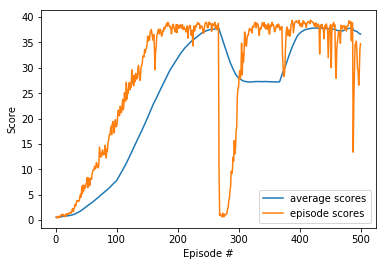

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores) + 1), avg_scores, label="average scores")
plt.plot(np.arange(1, len(episode_scores) + 1), episode_scores, label="episode scores")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()
fig.savefig("scores.png")

### 2. Watch a smart agent!


In [10]:
# load the weights from file

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                  # get an action (for each agent)
    env_info = env.step(actions)[brain_name] # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 36.344999187625945
